**Importing important libraries and enabling gpu on colab**

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
import seaborn as sns
import matplotlib.pyplot  as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
tf.__version__


'2.1.0-rc1'

In [0]:
import zipfile
import os
from pathlib import Path


**Loading data set to colab**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Data Varification

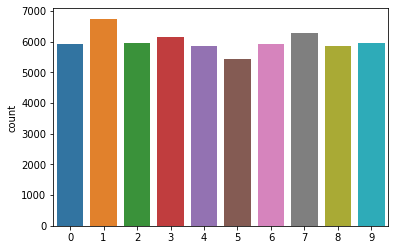

In [0]:
g = sns.countplot(y_train)


In [0]:
x_train.shape

(60000, 28, 28)

## **Prepare the training data**


**Normalizing Data**

In [0]:
x_train = x_train.astype('float32')
x_train = x_train.astype('float32')

x_train = x_train/255
x_test - x_test/255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [0]:
# one hot encoding y data
y_train= tf.keras.utils.to_categorical(y_train, 10)
y_test= tf.keras.utils.to_categorical(y_test, 10)


In [0]:
y_train.shape

(60000, 10)

**Reshaping Data**

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1,28 ,28, 1)
x_train.shape

(60000, 28, 28, 1)

In [0]:
# Important Variables
epochs = 30
num_classes = 10
batch_size = 128
input_shape = (28, 28, 1)
adam = tf.keras.optimizers.Adam(learning_rate=0.0008, beta_1=0.9, beta_2=0.999, amsgrad=False)




# **Training a MNIST model**

**Building model**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation= tf.nn.relu))
model.add(Conv2D(32, (3, 3), padding='same', activation= tf.nn.relu))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation= tf.nn.relu))
model.add(Conv2D(64, (3, 3), padding='same', activation= tf.nn.relu))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.3))


model.add(Dense(256, activation=tf.nn.relu))

model.add(Dropout(0.5))
model.add(Dense(10, activation= tf.nn.relu))

# Model Compile
model.compile(optimizer= adam, loss= tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

# Model Summery
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)         

#### **Training Model to get 99% accuracy**

In [0]:
History = model.fit(
          x_train,
          y_train,
          batch_size =batch_size,
          epochs = epochs,
          validation_data = (x_test, y_test),
          shuffle= True    
        )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 17s 281us/sample - loss: 1.4064 - accuracy: 0.6406 - val_loss: 0.9959 - val_accuracy: 0.7864
Epoch 2/30
60000/60000 [==============================] - 16s 267us/sample - loss: 0.7930 - accuracy: 0.8651 - val_loss: 0.4882 - val_accuracy: 0.9036
Epoch 3/30
60000/60000 [==============================] - 16s 268us/sample - loss: 0.4739 - accuracy: 0.9222 - val_loss: 0.1792 - val_accuracy: 0.9687
Epoch 4/30
60000/60000 [==============================] - 16s 267us/sample - loss: 0.4382 - accuracy: 0.9287 - val_loss: 0.2114 - val_accuracy: 0.9556
Epoch 5/30
60000/60000 [==============================] - 16s 266us/sample - loss: 0.8078 - accuracy: 0.8545 - val_loss: 0.3718 - val_accuracy: 0.9330
Epoch 6/30
60000/60000 [==============================] - 16s 268us/sample - loss: 0.5748 - accuracy: 0.8909 - val_loss: 0.4567 - val_accuracy: 0.8859
Epoch 7/30
60000/60000 [====================

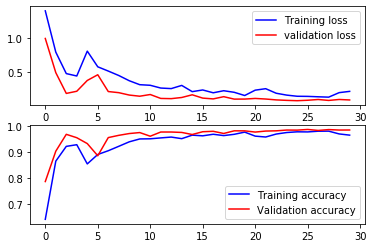

In [0]:
fig, ax = plt.subplots(2,1)
ax[0].plot(History.history['loss'], color='b', label="Training loss")
ax[0].plot(History.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=False)

ax[1].plot(History.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(History.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=False)

#### **Saving Model**

In [0]:
# saving model structure

model_structure = model.to_json()
file_path = Path("model_structure.json")
file_path.write_text(model_structure)


4741

In [0]:
# saving model's trained weight
model.save_weights("model_weights.h5")

## **Training Pruned Model**

In [0]:
pip install -q tensorflow-model-optimization

In [0]:
from tensorflow_model_optimization.sparsity import keras as k
import numpy as np


In [0]:
num_train_samples = x_train.shape[0]
end_step = np.ceil(1.0 * num_train_samples / batch_size).astype(np.int32) * 15
end_step

10590

In [0]:
pruning_params = {
      'pruning_schedule': k.PolynomialDecay(initial_sparsity=0.50,
                                                   final_sparsity=0.90,
                                                   begin_step=7000,
                                                   end_step=end_step,
                                                   frequency=100)
}

pruned_model = Sequential()

pruned_model.add(k.prune_low_magnitude(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation= tf.nn.relu), **pruning_params))
pruned_model.add(k.prune_low_magnitude(Conv2D(32, (3, 3), padding='same', activation= tf.nn.relu), **pruning_params))
pruned_model.add(MaxPool2D(pool_size=(2, 2)))
pruned_model.add(Dropout(0.25))

pruned_model.add(k.prune_low_magnitude(Conv2D(64, (3, 3), padding='same', activation= tf.nn.relu), **pruning_params))
pruned_model.add(k.prune_low_magnitude(Conv2D(64, (3, 3), padding='same', activation= tf.nn.relu), **pruning_params))
pruned_model.add(MaxPool2D(pool_size=(2, 2)))
pruned_model.add(Dropout(0.25))

#pruned_model.add(k.prune_low_magnitude(Dense(1024, activation=tf.nn.relu), **pruning_params))
#pruned_model.add(Dropout(0.3))

pruned_model.add(Flatten())
pruned_model.add(k.prune_low_magnitude(Dense(512, activation=tf.nn.relu), **pruning_params))
pruned_model.add(Dropout(0.3))


pruned_model.add(k.prune_low_magnitude(Dense(256, activation=tf.nn.relu), **pruning_params))

pruned_model.add(Dropout(0.5))
pruned_model.add(Dense(10, activation= tf.nn.relu))

# Pruned Model Compile
pruned_model.compile(optimizer= "adam", loss= tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

# Pruned Model Summery
pruned_model.summary()

Instructions for updating:
Please use `layer.add_weight` method instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d_4 (None, 28, 28, 32)        610       
_________________________________________________________________
prune_low_magnitude_conv2d_5 (None, 28, 28, 32)        18466     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
prune_low_magnitude_conv2d_6 (None, 14, 14, 64)        36930     
_________________________________________________________________
prune_low_magnitude_conv2d_7 (None, 14, 14, 64)        73794     
_______________________________________________

#### **Training pruned Model**

In [0]:
history = pruned_model.fit(
          x_train,
          y_train,
          batch_size =batch_size,
          epochs = 15,
          callbacks = [k.UpdatePruningStep()],
          validation_data = (x_test, y_test),
          shuffle= True    
        )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1978 - accuracy: 0.9680 - val_loss: 0.1147 - val_accuracy: 0.9792
Epoch 2/15
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2280 - accuracy: 0.9632 - val_loss: 0.0944 - val_accuracy: 0.9821
Epoch 3/15
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1816 - accuracy: 0.9714 - val_loss: 0.0930 - val_accuracy: 0.9827
Epoch 4/15
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1640 - accuracy: 0.9731 - val_loss: 0.0836 - val_accuracy: 0.9832
Epoch 5/15
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1736 - accuracy: 0.9704 - val_loss: 0.0812 - val_accuracy: 0.9850
Epoch 6/15
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1730 - accuracy: 0.9732 - val_loss: 0.0732 - val_accuracy: 0.9841
Epoch 7/15
60000/60000 [==========================

## **Saving Pruned Model**

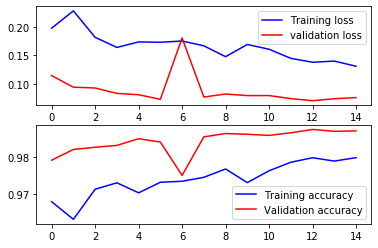

In [0]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=False)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=False)

In [0]:
# saving model structure

pruned_model_structure = pruned_model.to_json()
file_path = Path("pruned_model_structure.json")
file_path.write_text(pruned_model_structure)

7023

In [0]:
# saving model's trained weight
pruned_model.save_weights("model_weights.h5")